### **Advanced Deep Learning: Assignment 1**

**Task 4:**
Train a deep convolutional autoencoder with MNIST dataset and using extracted features train a MLP classifier with 7 outputs (7 segment LED display) that are representative of 10 digits.


# Step 1: Load required libraries

In [31]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential #for MLP classifer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras # Import keras for regularizers
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

# Step 2: Load MNIST data

In [32]:
#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
#explore the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [34]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

# Step 3: Train a deep convolutional autoencoder

In [35]:
#reshape data to include channel dimension

x_train_reshape = x_train.reshape((len(x_train), 28, 28, 1))
x_test_reshape = x_test.reshape((len(x_test), 28, 28, 1))
print(f"Shape of x_train after reshaping: {x_train_reshape.shape}")
print(f"Shape of x_test after reshaping: {x_test_reshape.shape}")


Shape of x_train after reshaping: (60000, 28, 28, 1)
Shape of x_test after reshaping: (10000, 28, 28, 1)


In [36]:
#define ENCODER

# Define input_img
input_img = Input(shape=(28, 28, 1))

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv2)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(pool2)

Encoder layers defined.


In [37]:
#define DECODER

conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
up1 = UpSampling2D((2, 2))(conv3)
conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv4)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

Decoder layers defined.


In [38]:
#build auto-encoder model
autoencoder = Model(input_img, decoded)

#Compile the autoencoder model with Adam optimizer and loss function
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)


In [39]:
# Normalize image data to [0, 1] range and convert to float32
x_train_normalized = x_train_reshape.astype('float32') / 255.
x_test_normalized = x_test_reshape.astype('float32') / 255.

print(f"Shape of normalized x_train: {x_train_normalized.shape}, Dtype: {x_train_normalized.dtype}")
print(f"Shape of normalized x_test: {x_test_normalized.shape}, Dtype: {x_test_normalized.dtype}")

Shape of normalized x_train: (60000, 28, 28, 1), Dtype: float32
Shape of normalized x_test: (10000, 28, 28, 1), Dtype: float32


In [40]:
# Create TensorFlow Dataset objects for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_normalized, x_train_normalized)).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_normalized, x_test_normalized)).batch(128)

autoencoder.fit(train_dataset,
                epochs=10,
                validation_data=test_dataset)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 186s 394ms/step - accuracy: 0.8052 - loss: 0.2115 - val_accuracy: 0.8140 - val_loss: 0.0797
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 187s 400ms/step - accuracy: 0.8145 - loss: 0.0773 - val_accuracy: 0.8143 - val_loss: 0.0732
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 184s 393ms/step - accuracy: 0.8147 - loss: 0.0729 - val_accuracy: 0.8144 - val_loss: 0.0713
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 190s 406ms/step - accuracy: 0.8148 - loss: 0.0709 - val_accuracy: 0.8144 - val_loss: 0.0700
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 195s 392ms/step - accuracy: 0.8149 - loss: 0.0697 - val_accuracy: 0.8144 - val_loss: 0.0688
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 392ms/step - accuracy: 0.8149 - loss: 0.0688 - val_accuracy: 0.8144 - val_loss: 0.0680
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 185s 394ms/step - accuracy: 0.8149 - loss: 0.0682 - val_accuracy: 0.8144 - val_loss: 0.0676
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 184s 393ms/step - accuracy: 0.8149 -

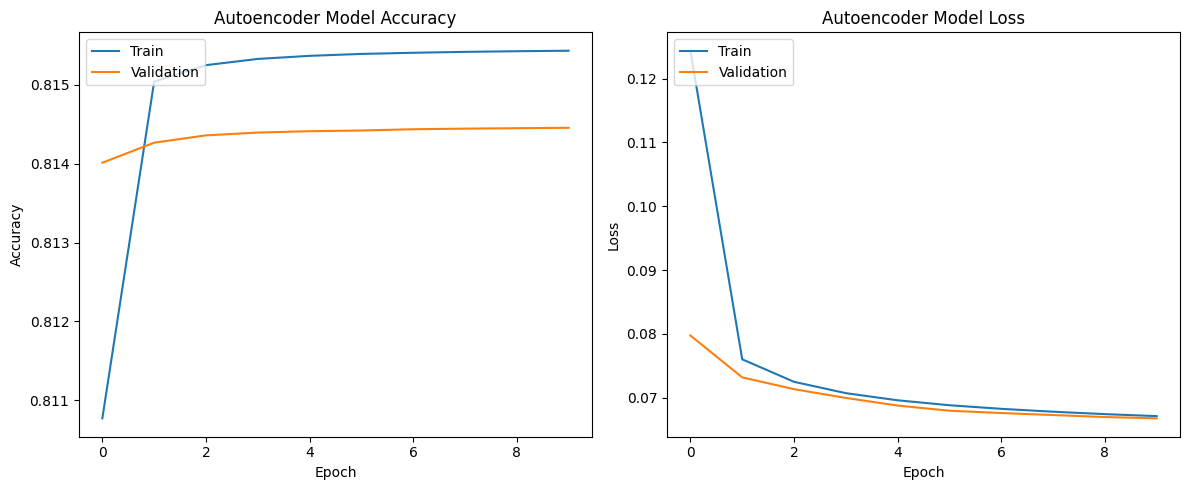

In [41]:
#plot the accuracy, validation accuracy and validation loss
history = autoencoder.history

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Autoencoder Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

The autoencoder model has good accuracy on the training and validation data

# STEP 4: FEATURE EXTRACTION FROM CONVOLUTIONAL AUTO-ENCODER

In [42]:
encoded_features_train = autoencoder.predict(x_train)
print(f"Shape of encoded training features: {encoded_features_train.shape}")

encoded_features_test = autoencoder.predict(x_test)
print(f"Shape of encoded features: {encoded_features_test.shape}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step
Shape of encoded training features: (60000, 28, 28, 1)
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step
Shape of encoded features: (10000, 28, 28, 1)


In [43]:
flattened_features_train = encoded_features_train.reshape(encoded_features_train.shape[0], -1)
flattened_features_test = encoded_features_test.reshape(encoded_features_test.shape[0], -1)

print(f"Shape of flattened training features: {flattened_features_train.shape}")
print(f"Shape of flattened test features: {flattened_features_test.shape}")

Shape of flattened training features: (60000, 784)
Shape of flattened test features: (10000, 784)


Visualize the clusters

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.022s...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 60000 samples in 215.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sample 13000 / 60000
[t-SNE] Computed conditional probabilities for sample 14000 / 600

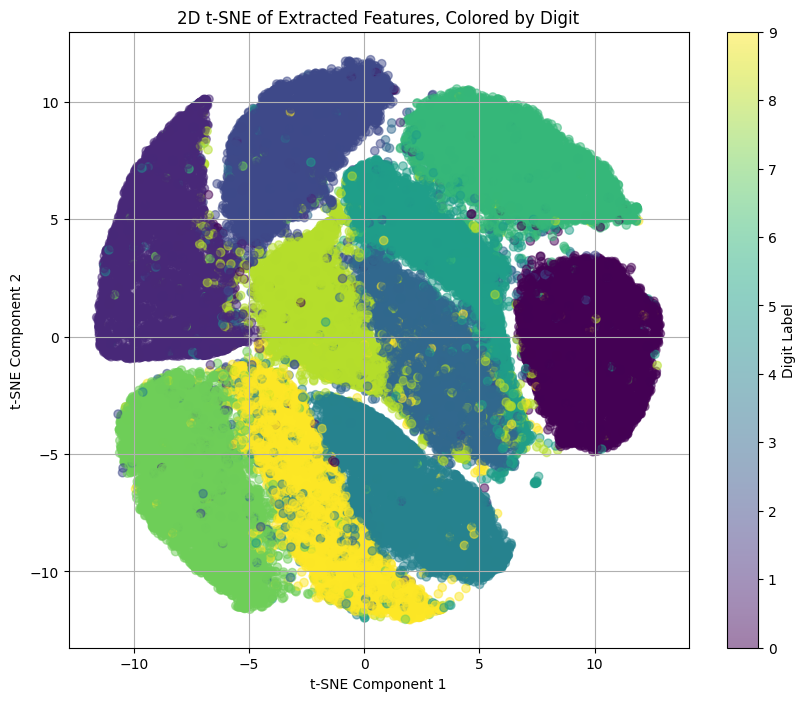

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, verbose=1, perplexity=30, n_iter=300)
reduced_features_tsne = tsne.fit_transform(flattened_features_train)
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features_tsne[:, 0], reduced_features_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Digit Label')
plt.title('2D t-SNE of Extracted Features, Colored by Digit')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

From the t-SNE plot we can see that the features are able to differentiate between the digits

In [45]:
encoder = Model(input_img, encoded)

# Step 5:  7-Segment LED Mapping


Reference:

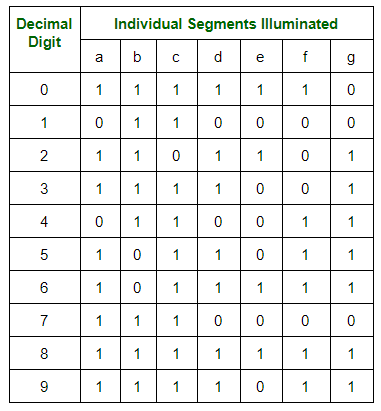

In [46]:
# Define the 7-segment LED patterns for digits 0-9
# The order of segments can be A, B, C, D, E, F, G
#   A
# F   B
#   G
# E   C
#   D

seven_segment_map = {
    0: [1, 1, 1, 1, 1, 1, 0],  # All segments except G
    1: [0, 1, 1, 0, 0, 0, 0],  # B, C
    2: [1, 1, 0, 1, 1, 0, 1],  # A, B, D, E, G
    3: [1, 1, 1, 1, 0, 0, 1],  # A, B, C, D, G
    4: [0, 1, 1, 0, 0, 1, 1],  # B, C, F, G
    5: [1, 0, 1, 1, 0, 1, 1],  # A, C, D, F, G
    6: [1, 0, 1, 1, 1, 1, 1],  # A, C, D, E, F, G
    7: [1, 1, 1, 0, 0, 0, 0],  # A, B, C
    8: [1, 1, 1, 1, 1, 1, 1],  # All segments
    9: [1, 1, 1, 1, 0, 1, 1]   # A, B, C, D, F, G
}

print("7-segment LED mapping defined.")

7-segment LED mapping defined.


In [47]:
#apply 7-segment to train and test to create target variables

y_train_7segment = np.array([seven_segment_map[digit] for digit in y_train])
y_test_7segment = np.array([seven_segment_map[digit] for digit in y_test])

print(f"Shape of 7-segment training labels: {y_train_7segment.shape}")
print(f"Shape of 7-segment test labels: {y_test_7segment.shape}")

Shape of 7-segment training labels: (60000, 7)
Shape of 7-segment test labels: (10000, 7)


# Step 6: MLP Model for 7-LED Output

The input dimension will be the size of our flattened features, and the output layer will have 7 neurons with a sigmoid activation function

In [48]:
# Input dimension for the MLP is the size of the flattened features
input_dim_mlp = flattened_features_train.shape[1]

mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim_mlp,), kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(7, activation='sigmoid') # 7 outputs for the 7 segments, sigmoid for binary classification per segment
])

mlp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,191 (426.53 KB)

 Trainable params: 109,191 (426.53 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#binary_crossentropy is the loss function
#Adam optimizer is used

mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
                  loss='binary_crossentropy',
                  metrics=['accuracy','precision','recall'])

In [50]:
mlp_model.fit(flattened_features_train, y_train_7segment,
              epochs=30,
              batch_size=32,
              validation_data=(flattened_features_test, y_test_7segment))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4557 - loss: 0.9108 - precision: 0.7475 - recall: 0.7025 - val_accuracy: 0.4787 - val_loss: 0.6507 - val_precision: 0.8210 - val_recall: 0.9684
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3654 - loss: 0.6480 - precision: 0.8304 - recall: 0.9341 - val_accuracy: 0.3123 - val_loss: 0.5084 - val_precision: 0.8884 - val_recall: 0.9682
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2949 - loss: 0.5318 - precision: 0.8795 - recall: 0.9420 - val_accuracy: 0.2892 - val_loss: 0.4239 - val_precision: 0.9219 - val_recall: 0.9687
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2820 - loss: 0.4581 - precision: 0.9064 - recall: 0.9461 - val_accuracy: 0.3131 - val_loss: 0.3747 - val_precision: 0.9352 - val_recall: 0.9732
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2940 - loss: 0.4132 - precision: 0.9202 - recall: 0.9507 - val_accuracy: 0.3196 -

In [51]:
#predict using MLP classifier
y_pred_mlp = mlp_model.predict(flattened_features_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [52]:
#calculate accuracy on the test dataset of the MLP classifier
from sklearn.metrics import accuracy_score
accuracy_mlp = accuracy_score(y_test_7segment, y_pred_mlp.round())
print(f"Accuracy of MLP Classifier: {accuracy_mlp}")


Accuracy of MLP Classifier: 0.9031


#Step 7: Visualize Predicted 7-Segment LED Displays

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


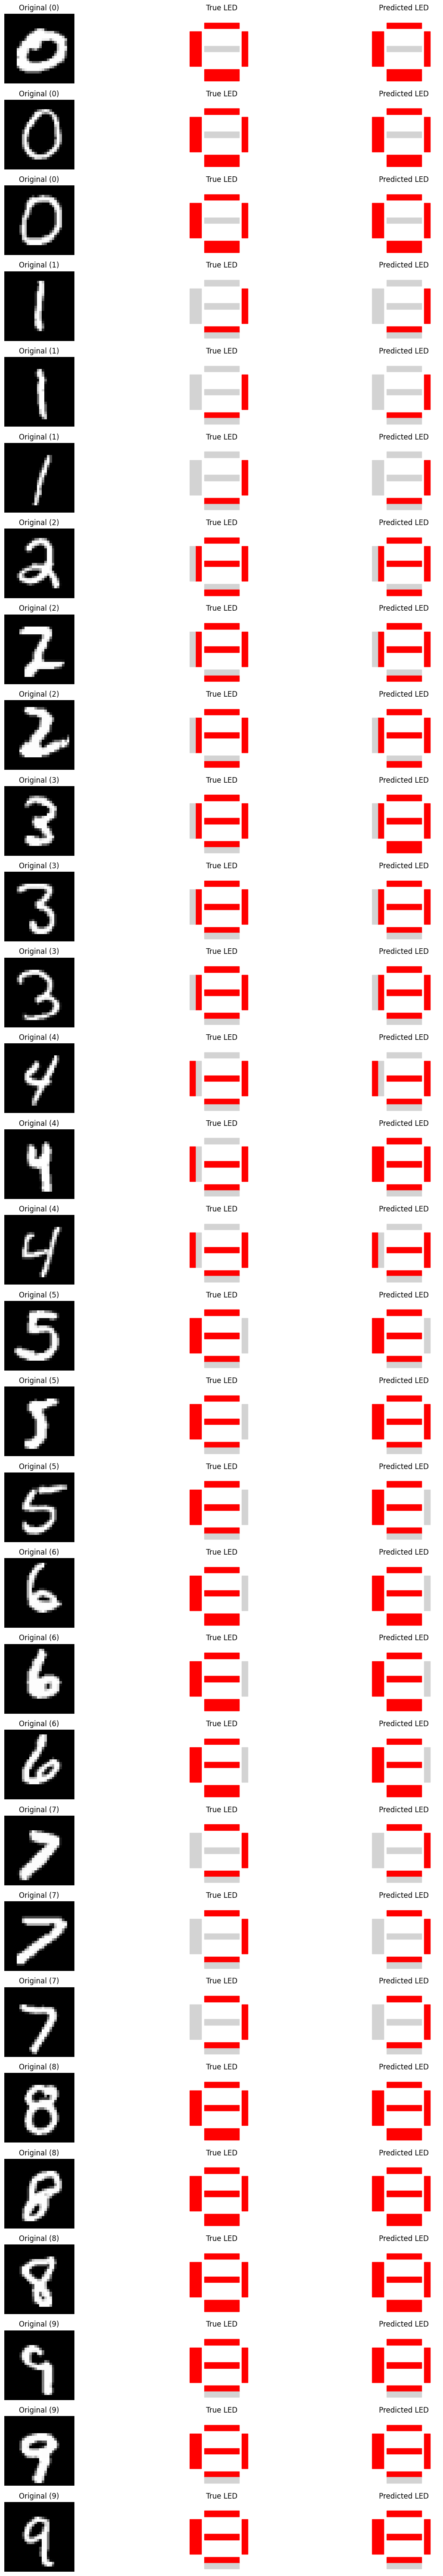

Visualization of predicted 7-segment LED displays complete.


In [53]:
# Get MLP predictions for the test set
y_pred_mlp_prob = mlp_model.predict(flattened_features_test)
# Convert probabilities to binary (0 or 1) using a threshold of 0.5
y_pred_mlp_binary = (y_pred_mlp_prob > 0.5).astype(int)

# Function to draw a 7-segment display
def draw_7_segment(ax, segments, title=""):
    # Segment coordinates (relative to a 10x10 grid for drawing)
    #   A
    # F   B
    #   G
    # E   C
    #   D
    segment_coords = {
        0: [(2, 9), (8, 9)], # A
        1: [(9, 8), (9, 2)], # B
        2: [(8, 1), (2, 1)], # C
        3: [(1, 2), (1, 8)], # D
        4: [(2, 0), (8, 0)], # E
        5: [(0, 8), (0, 2)], # F
        6: [(2, 5), (8, 5)]  # G
    }

    ax.set_xlim(-1, 11)
    ax.set_ylim(-1, 11)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    ax.set_title(title)

    for i, (start, end) in segment_coords.items():
        color = 'red' if segments[i] == 1 else 'lightgray'
        # Adjust thickness for horizontal vs vertical
        if i in [0, 2, 4, 6]: # Horizontal segments
            ax.add_patch(patches.Rectangle((start[0], start[1] - 0.5), end[0] - start[0], 1, color=color))
        else: # Vertical segments
            ax.add_patch(patches.Rectangle((start[0] - 0.5, start[1]), 1, end[1] - start[1], color=color))

# Display predictions for a few examples of each digit
num_examples_per_digit = 3

plt.figure(figsize=(15, 2 * 10 * num_examples_per_digit))

for digit in range(10):
    # Get indices for this digit from the test set
    digit_indices = np.where(y_test == digit)[0]
    np.random.shuffle(digit_indices) # Shuffle to get random examples

    for i in range(min(num_examples_per_digit, len(digit_indices))):
        idx = digit_indices[i]

        # Original MNIST Image
        ax1 = plt.subplot(10 * num_examples_per_digit, 3, (digit * num_examples_per_digit + i) * 3 + 1)
        ax1.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        ax1.set_title(f"Original ({digit})")
        ax1.axis('off')

        # True 7-segment LED
        ax2 = plt.subplot(10 * num_examples_per_digit, 3, (digit * num_examples_per_digit + i) * 3 + 2)
        draw_7_segment(ax2, y_test_7segment[idx], "True LED")

        # Predicted 7-segment LED
        ax3 = plt.subplot(10 * num_examples_per_digit, 3, (digit * num_examples_per_digit + i) * 3 + 3)
        draw_7_segment(ax3, y_pred_mlp_binary[idx], "Predicted LED")

plt.tight_layout()
plt.show()

print("Visualization of predicted 7-segment LED displays complete.")
